### Code to run bichromatical images for restoration
In this notebook we will look at the bichromatical transformations and their denoising through Markov Chain Methodology.

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [63]:
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [64]:
import matplotlib.pyplot as plt

def display_images(orig, restored, cmap=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.imshow(orig, cmap=cmap)
    ax1.set_title('Noisy Input')
    ax1.axis('off')

    ax2.imshow(restored, cmap=cmap)
    ax2.set_title('Restored Output')
    ax2.axis('off')

    plt.show()


(300, 400, 3)


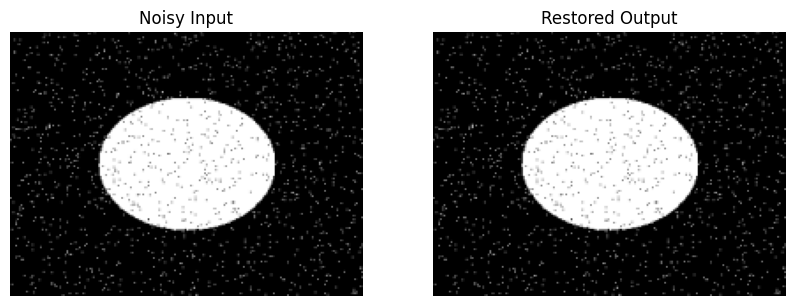

In [65]:
noisy_path = Path('..','Data', 'Transformed', 'bichromatical_noised', 'circle.png')
noisy = cv2.imread(noisy_path, cv2.IMREAD_COLOR)
noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)
# print(noisy.shape)
#resize to 300x400
noisy = cv2.resize(noisy, (400, 300), interpolation=cv2.INTER_AREA)
print(noisy.shape)
downscale_factor = 0.5
noisy = cv2.resize(
    noisy,
    (0, 0),
    fx=downscale_factor,
    fy=downscale_factor,
    interpolation=cv2.INTER_AREA
)
if noisy is None:
    raise FileNotFoundError(f"Cannot load image at {noisy_path}")
# Display noisy input
display_images(noisy, noisy, cmap='gray')

In [67]:
import numpy as np
from MarkovObjects.GibbsEstimator import (
    LpLoss, LorentzianLoss, SparseGradientPrior,
    WindowPatternTerm, GridMRF, GibbsSampler
)

# pick your loss, prior and (optional) window
loss = LorentzianLoss(sigma=1)
prior = SparseGradientPrior(p=1)
window = WindowPatternTerm(noisy, window_size=3, n_components=5)

# build the MRF
mrf = GridMRF(noisy, loss, prior,
               lambda_r=5.0,    
               window_term=None,
               lambda_w=0.0,
               neighbor_offsets=[(-1,0),(1,0),(0,-1),(0,1)],
               binary_map=True
             )


In [68]:
# run Gibbs
num_iter = 200
betas = 1.0
sampler = GibbsSampler(mrf,
                       num_iter=num_iter,
                       burn_in=50,
                       verbose=True,
                       betas_T=np.linspace(0.2, 2.0, num_iter), 
                       beta_prior=0.5,                     
                       pior_type_for_optimal='quadratic',
                       estimate_mode='mean'
                      )
sampler.fit_optimised(parallel_channels=False, shuffle_pixels=True, binary_map=True)
denoised = sampler.estimate()

[Channel 0][Iter 10] Loss=17923.18, Energy=97370081.02
[Channel 0][Iter 20] Loss=13592.41, Energy=75508937.06
[Channel 0][Iter 30] Loss=10531.15, Energy=59835236.44
[Channel 0][Iter 40] Loss=8154.31, Energy=47415467.00
[Channel 0][Iter 50] Loss=7144.70, Energy=42199252.59
[Channel 0][Iter 60] Loss=6309.44, Energy=37844071.68
[Channel 0][Iter 70] Loss=5893.44, Energy=35671487.84
[Channel 0][Iter 80] Loss=5577.58, Energy=34039543.61
[Channel 0][Iter 90] Loss=5472.56, Energy=33483884.15
[Channel 0][Iter 100] Loss=5339.98, Energy=32813082.23
[Channel 0][Iter 110] Loss=5276.72, Energy=32482689.31
[Channel 0][Iter 120] Loss=5240.23, Energy=32297468.00
[Channel 0][Iter 130] Loss=5236.99, Energy=32287454.77
[Channel 0][Iter 140] Loss=5219.96, Energy=32202352.82
[Channel 0][Iter 150] Loss=5213.47, Energy=32167311.37
[Channel 0][Iter 160] Loss=5212.25, Energy=32167310.16
[Channel 0][Iter 170] Loss=5211.44, Energy=32162304.35
[Channel 0][Iter 180] Loss=5211.85, Energy=32167309.75
[Channel 0][Iter

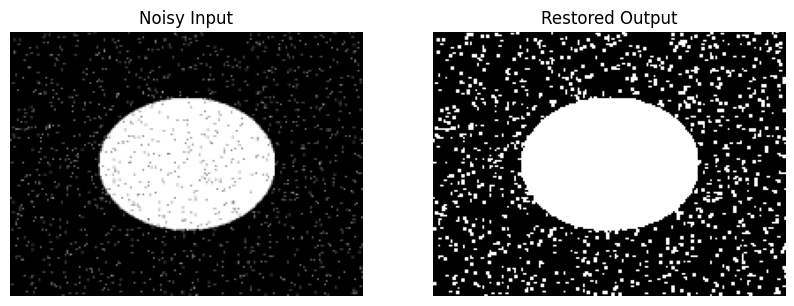

In [61]:
display_images(noisy, denoised, cmap="gray")

In [69]:
# run Gibbs
num_iter = 200
betas = 1.0
sampler = GibbsSampler(mrf,
                       num_iter=num_iter,
                       burn_in=50,
                       verbose=True,
                       betas_T=np.linspace(0.2, 2.0, num_iter), 
                       beta_prior=0.5,                     
                       pior_type_for_optimal='quadratic',
                       estimate_mode='map'
                      )
sampler.fit_optimised(parallel_channels=False, shuffle_pixels=True, binary_map=True)
denoised = sampler.estimate()

[Channel 0][Iter 10] Loss=18017.65, Energy=97980784.89
[Channel 0][Iter 20] Loss=13426.57, Energy=74637902.10
[Channel 0][Iter 30] Loss=10425.32, Energy=59159456.29
[Channel 0][Iter 40] Loss=8480.30, Energy=49187561.22
[Channel 0][Iter 50] Loss=7189.30, Energy=42399496.99
[Channel 0][Iter 60] Loss=6362.15, Energy=38074354.16
[Channel 0][Iter 70] Loss=5912.90, Energy=35806642.17
[Channel 0][Iter 80] Loss=5515.54, Energy=33674116.94
[Channel 0][Iter 90] Loss=5404.04, Energy=33138470.97
[Channel 0][Iter 100] Loss=5355.79, Energy=32893177.97
[Channel 0][Iter 110] Loss=5289.29, Energy=32547766.81
[Channel 0][Iter 120] Loss=5248.34, Energy=32317496.09
[Channel 0][Iter 130] Loss=5217.53, Energy=32187335.41
[Channel 0][Iter 140] Loss=5230.91, Energy=32267428.71
[Channel 0][Iter 150] Loss=5215.50, Energy=32187333.38
[Channel 0][Iter 160] Loss=5219.96, Energy=32212362.81
[Channel 0][Iter 170] Loss=5206.17, Energy=32137274.10
[Channel 0][Iter 180] Loss=5208.60, Energy=32147286.53
[Channel 0][Iter

In [70]:
# run Gibbs
num_iter = 200
betas = 1.0
sampler = GibbsSampler(mrf,
                       num_iter=num_iter,
                       burn_in=50,
                       verbose=True,
                       betas_T=np.linspace(0.2, 2.0, num_iter), 
                       beta_prior=0.5,                     
                       pior_type_for_optimal='potts',
                       estimate_mode='map'
                      )
sampler.fit_optimised(parallel_channels=False, shuffle_pixels=True, binary_map=True)
denoised = sampler.estimate()

[Channel 0][Iter 10] Loss=15898.69, Energy=86652362.23
[Channel 0][Iter 20] Loss=11523.32, Energy=64370754.09
[Channel 0][Iter 30] Loss=8682.63, Energy=49663238.07
[Channel 0][Iter 40] Loss=7026.30, Energy=41143080.25
[Channel 0][Iter 50] Loss=6236.05, Energy=37168323.97
[Channel 0][Iter 60] Loss=5751.12, Energy=34755431.44
[Channel 0][Iter 70] Loss=5424.72, Energy=33058411.73
[Channel 0][Iter 80] Loss=5347.68, Energy=32773049.98
[Channel 0][Iter 90] Loss=5282.40, Energy=32442655.03
[Channel 0][Iter 100] Loss=5240.64, Energy=32257428.45
[Channel 0][Iter 110] Loss=5241.85, Energy=32282454.64
[Channel 0][Iter 120] Loss=5211.85, Energy=32127269.79
[Channel 0][Iter 130] Loss=5196.85, Energy=32057184.86
[Channel 0][Iter 140] Loss=5204.14, Energy=32107242.11
[Channel 0][Iter 150] Loss=5205.36, Energy=32117253.31
[Channel 0][Iter 160] Loss=5203.74, Energy=32117251.69
[Channel 0][Iter 170] Loss=5206.98, Energy=32137274.91
[Channel 0][Iter 180] Loss=5203.33, Energy=32117251.29
[Channel 0][Iter 

In [71]:
# run Gibbs
num_iter = 200
betas = 1.0
sampler = GibbsSampler(mrf,
                       num_iter=num_iter,
                       burn_in=50,
                       verbose=True,
                       betas_T=np.linspace(0.2, 2.0, num_iter), 
                       beta_prior=0.5,                     
                       pior_type_for_optimal='potts',
                       estimate_mode='mean'
                      )
sampler.fit_optimised(parallel_channels=False, shuffle_pixels=True, binary_map=True)
denoised = sampler.estimate()

[Channel 0][Iter 10] Loss=16060.07, Energy=87343212.91
[Channel 0][Iter 20] Loss=11709.02, Energy=65266833.90
[Channel 0][Iter 30] Loss=8702.50, Energy=49783377.82
[Channel 0][Iter 40] Loss=7163.76, Energy=42014086.83
[Channel 0][Iter 50] Loss=6183.34, Energy=36892996.53
[Channel 0][Iter 60] Loss=5729.22, Energy=34645299.65
[Channel 0][Iter 70] Loss=5502.57, Energy=33523954.12
[Channel 0][Iter 80] Loss=5334.70, Energy=32677942.10
[Channel 0][Iter 90] Loss=5265.37, Energy=32322518.12
[Channel 0][Iter 100] Loss=5243.88, Energy=32267441.68
[Channel 0][Iter 110] Loss=5230.91, Energy=32232393.74
[Channel 0][Iter 120] Loss=5215.09, Energy=32157303.00
[Channel 0][Iter 130] Loss=5209.42, Energy=32147287.34
[Channel 0][Iter 140] Loss=5205.77, Energy=32127263.71
[Channel 0][Iter 150] Loss=5201.31, Energy=32097229.28
[Channel 0][Iter 160] Loss=5206.17, Energy=32137274.10
[Channel 0][Iter 170] Loss=5203.33, Energy=32117251.29
[Channel 0][Iter 180] Loss=5206.17, Energy=32137274.10
[Channel 0][Iter 